<a href="https://colab.research.google.com/github/kojiyam/denso/blob/master/denso06_spatially_correlated_shadowing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AR過程による空間相関シャドウイングの生成

In [1]:
import numpy as np
np.random.seed(1)

import scipy as sp
from scipy.linalg import circulant

import matplotlib.pyplot as plt
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42
plt.rcParams["font.size"] = 12

# AR(1)

定常1次AR過程(定数項なし) $X_k=\rho X_{k-1} + \epsilon_k$の$n$次自己相関は$\rho^n$である

分散が1の，定常1次AR過程を作るには，分散を$1-\rho^2$にすればよい

In [2]:
rho = 0.9

In [3]:
N = 10000 # 出力サンプル数
E = np.random.normal(loc=0.0, scale=np.sqrt(1-rho**2), size=N)
X = np.empty(N)

In [4]:
X[0] = E[0]
for i in np.arange(1,N):
  X[i] = rho*X[i-1] + E[i]

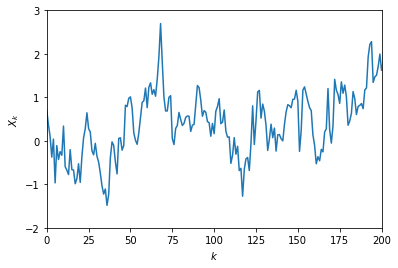

In [5]:
plt.xlim(0,200)
plt.ylim(-2,3)
plt.ylabel("$X_k$")
plt.xlabel("$k$")
plt.plot(X)

In [6]:
np.average(X)

0.04325078486902754

In [7]:
np.var(X)

1.0128010777104333

## $\sigma=8\,\mathrm{dB}$の場合

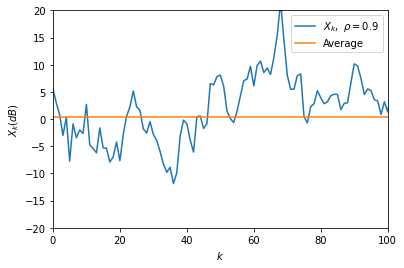

In [8]:
sigma = 8
plt.xlim(0,100)
plt.ylim(-20,20)
plt.ylabel("$X_k (dB)$")
plt.xlabel("$k$")
plt.plot(sigma*X, label=r"$X_k,\ \rho=0.9$")
xtics = np.array([0,200])
average_X = xtics*0+np.average(sigma*X)
plt.plot(xtics, average_X, label="Average")
plt.legend()
plt.savefig("denso06_X_correlated.pdf", transparent=True, bbox_inches='tight')

## 自己相関

In [9]:
# この作り方は，本当はDFTに入れるような周期的な場合
h_acf = circulant(X).T @ X

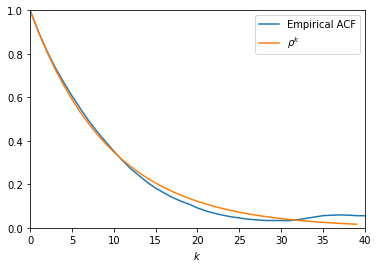

In [10]:
# real partだけ取っていることの妥当性を検証していない
xtics = np.arange(40)
plt.xlim(0,40)
plt.ylim(0,1)
plt.xlabel(r"$k$")
plt.plot(h_acf / h_acf[0] , label=r"Empirical ACF")
plt.plot(xtics, 0.9**xtics, label=r"$\rho^k$")
plt.legend()
plt.savefig("denso06_X_correlated_acf.pdf", transparent=True, bbox_inches='tight')